# Micro Credit Defaulter Project

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).



The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_excel(r'C:\python\MCD.xlsx')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


We have the label column that stores the defaulter and non deafulter values with 0 and 1 making this a Classification problem

# Explanatory Data Analysis

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Removed 'unnamed:0' column since it has no meaningful values 

In [5]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))


We have 209593 Rows and 36 Columns in our dataframe


# Check For missing Values

In [6]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

We dont have to handle any missing values since we dont have any missing values

In [7]:
df.drop_duplicates(inplace=True)
print("Number of Rows is {} and number of Columns is {} after dropping duplicates".format(df.shape[0], df.shape[1]))

Number of Rows is 209592 and number of Columns is 36 after dropping duplicates


We had only one duplicate row and it is removed

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209592 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209592 non-null  int64         
 1   msisdn                209592 non-null  object        
 2   aon                   209592 non-null  float64       
 3   daily_decr30          209592 non-null  float64       
 4   daily_decr90          209592 non-null  float64       
 5   rental30              209592 non-null  float64       
 6   rental90              209592 non-null  float64       
 7   last_rech_date_ma     209592 non-null  float64       
 8   last_rech_date_da     209592 non-null  float64       
 9   last_rech_amt_ma      209592 non-null  int64         
 10  cnt_ma_rech30         209592 non-null  int64         
 11  fr_ma_rech30          209592 non-null  float64       
 12  sumamnt_ma_rech30     209592 non-null  int64         
 13 

Using info() method we found the data types of the columns are found. there are 3 columns with categorical data type which needs to be converted to numeric form before sending it to the machine learning model.

# To Find Unique Values

In [9]:
df.nunique().sort_values()

pcircle                      1
label                        2
maxamnt_loans90              3
medianamnt_loans90           6
medianamnt_loans30           6
cnt_da_rech90               27
cnt_loans30                 40
fr_da_rech90                46
amnt_loans30                48
amnt_loans90                69
last_rech_amt_ma            70
cnt_ma_rech30               71
pdate                       82
fr_ma_rech90                89
cnt_ma_rech90              110
medianamnt_ma_rech30       510
medianamnt_ma_rech90       608
maxamnt_loans30           1050
cnt_da_rech30             1066
fr_da_rech30              1072
fr_ma_rech30              1083
cnt_loans90               1110
last_rech_date_da         1174
last_rech_date_ma         1186
payback30                 1363
payback90                 2381
aon                       4507
sumamnt_ma_rech30        15141
medianmarechprebal90     29785
medianmarechprebal30     30428
sumamnt_ma_rech90        31771
rental30                132148
rental90

column pcircle has only one value throughout the dataset, so deleting it due its less contribution to the Label.

In [10]:
df.drop('pcircle', axis=1, inplace=True)

In [11]:
df.shape

(209592, 35)

# Data Preprocessing

In [12]:
df['pdate']= pd.to_datetime(df['pdate'])

df['year']= df['pdate'].dt.year
df['month']= df['pdate'].dt.month
df['date']= df['pdate'].dt.day

In [13]:
df.drop(columns=['msisdn', 'pdate'], axis=1, inplace=True)

Dropping pdate and msisdn since it is only phone number and has no contribution to the label

# Visualization

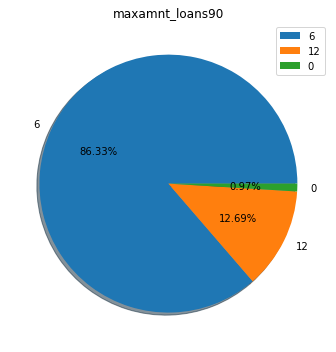

In [16]:
plt.figure(figsize=(10,5))
plt.pie(df['maxamnt_loans90'].value_counts(), labels=df['maxamnt_loans90'].value_counts().index, shadow= True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('maxamnt_loans90')
plt.tight_layout()
plt.show()

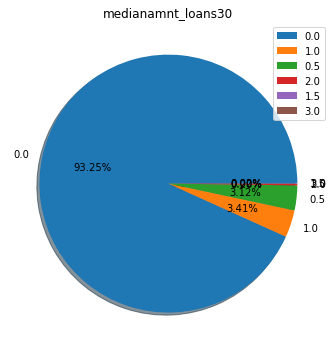

In [17]:
plt.figure(figsize=(10,5))
plt.pie(df['medianamnt_loans30'].value_counts(), labels=df['medianamnt_loans30'].value_counts().index, shadow= True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('medianamnt_loans30')
plt.tight_layout()
plt.show()

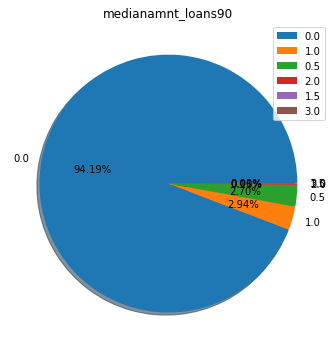

In [18]:
plt.figure(figsize=(10,5))
plt.pie(df['medianamnt_loans90'].value_counts(), labels=df['medianamnt_loans90'].value_counts().index, shadow= True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('medianamnt_loans90')
plt.tight_layout()
plt.show()

# Bivariate Analysis

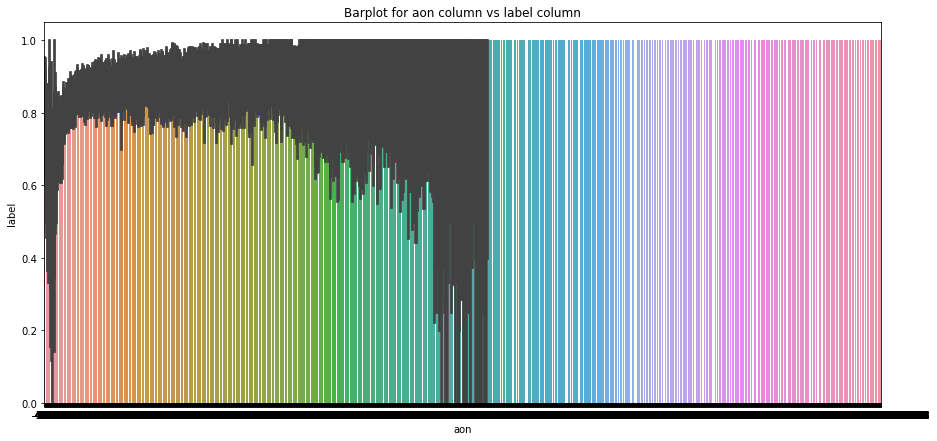

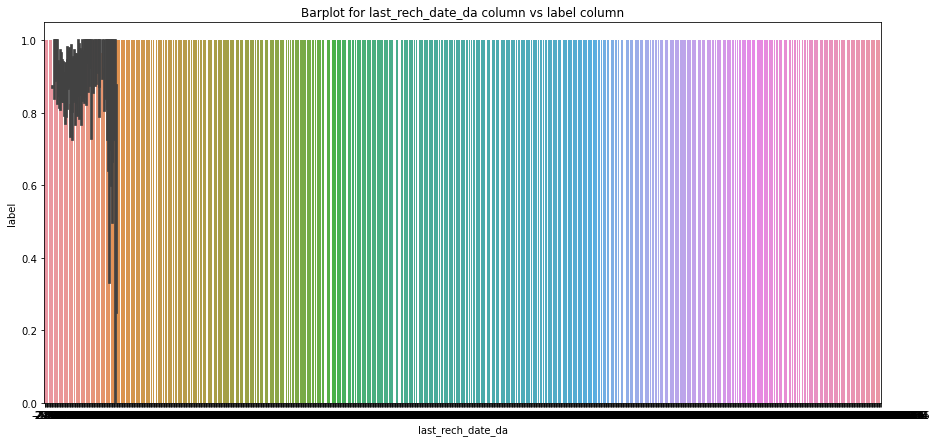

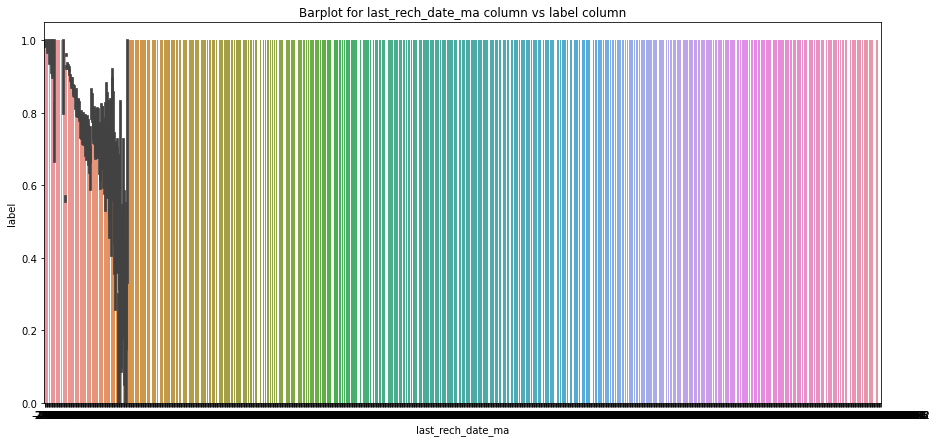

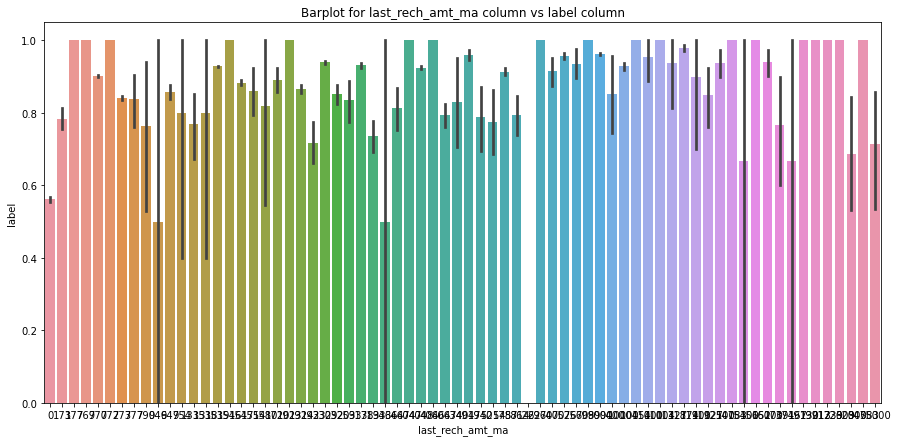

In [19]:
y = 'label'

x = 'aon'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_da'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_amt_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df)
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

Here we see the recharge amount with respect to label and its distribution

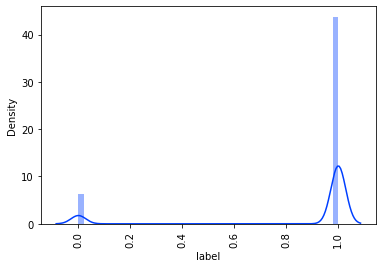

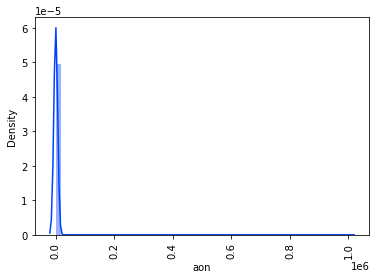

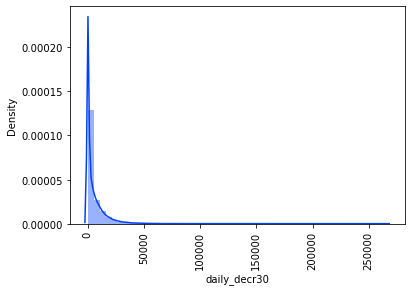

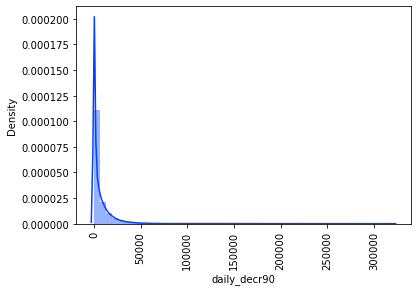

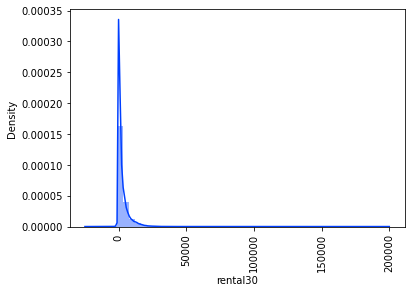

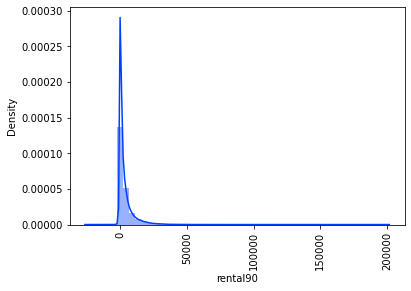

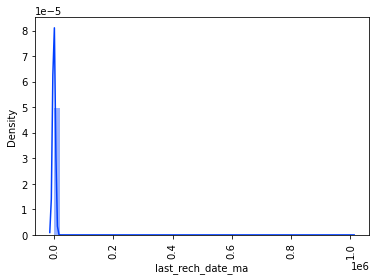

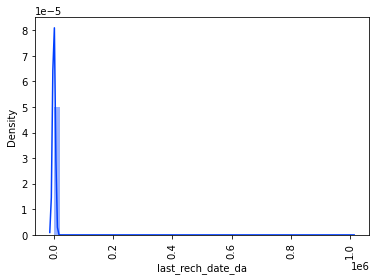

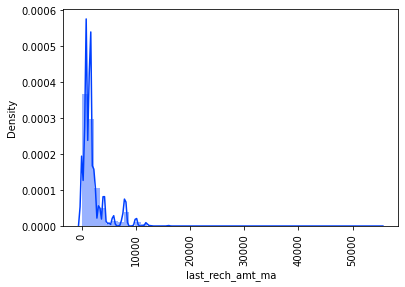

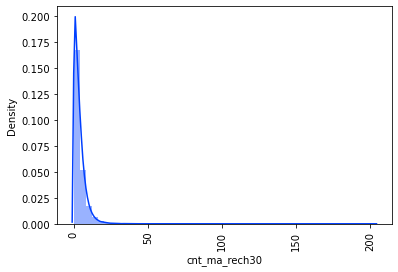

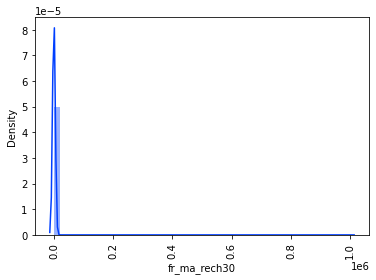

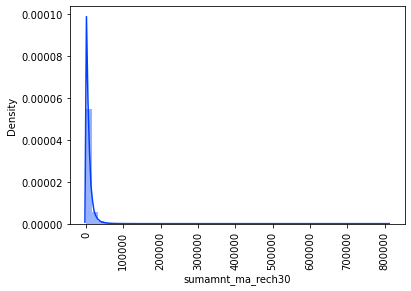

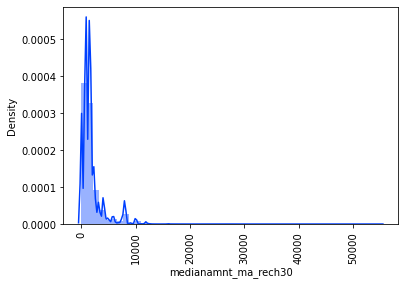

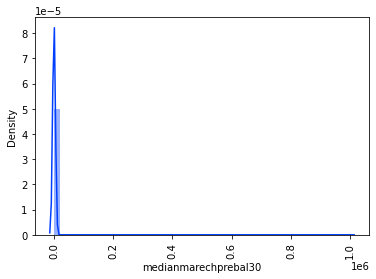

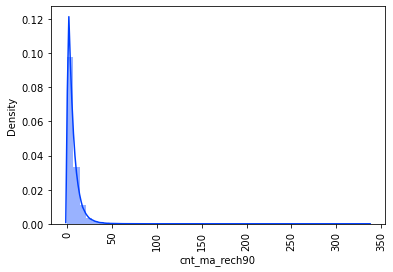

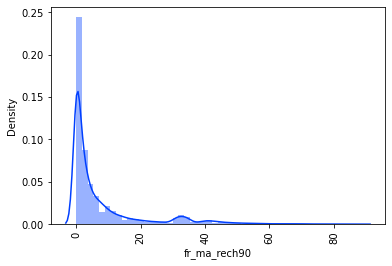

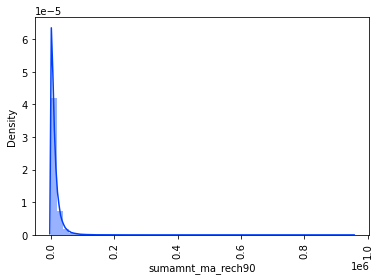

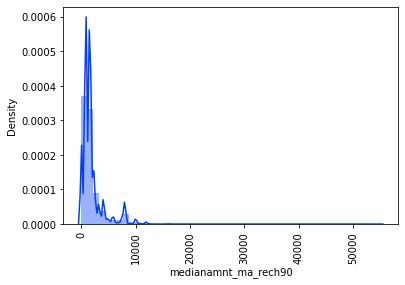

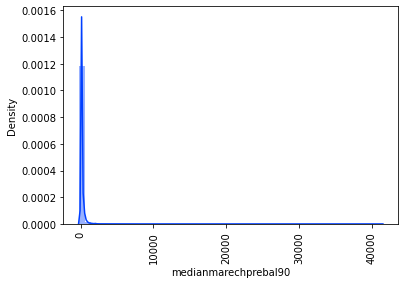

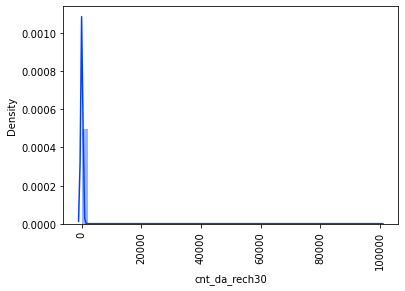

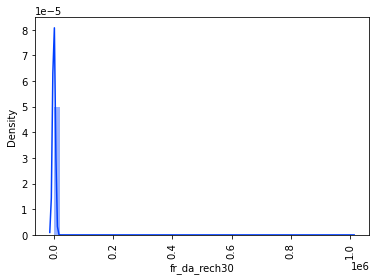

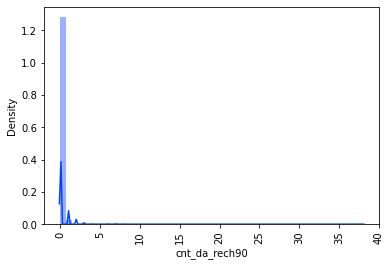

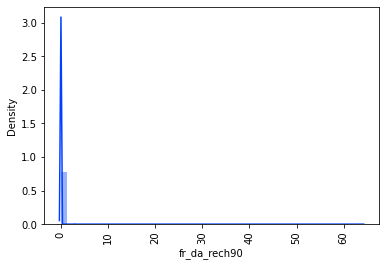

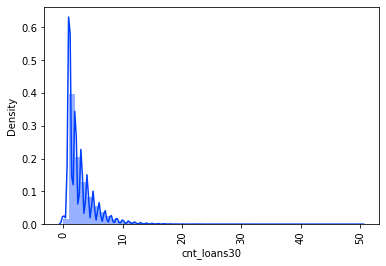

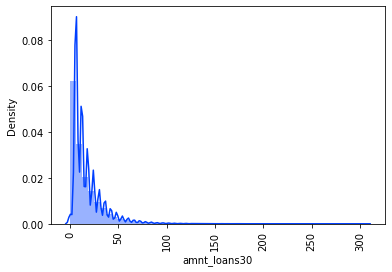

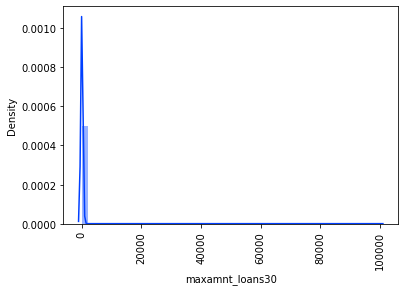

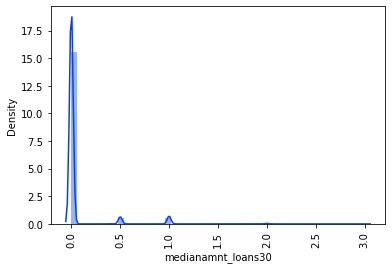

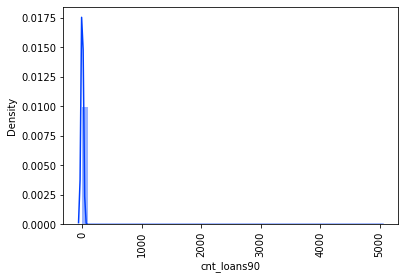

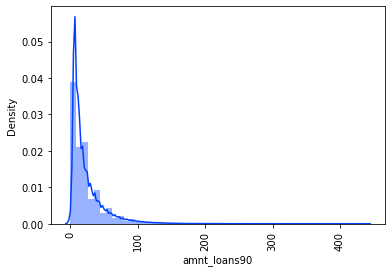

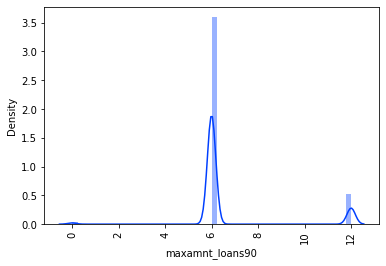

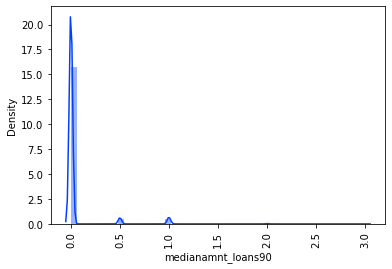

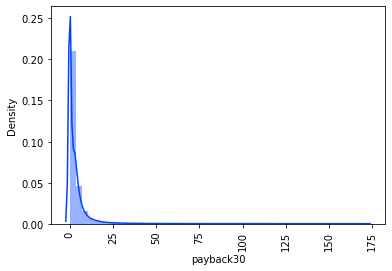

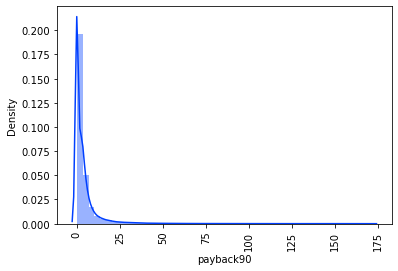

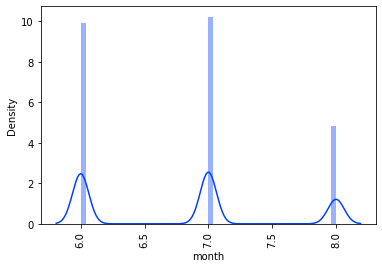

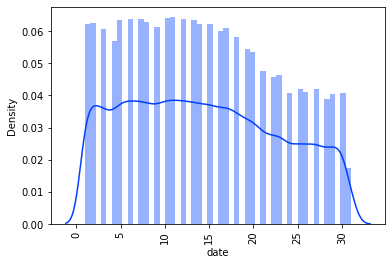

In [125]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

In [14]:
df.drop('year', axis=1, inplace=True)

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='medianamnt_loans90'>

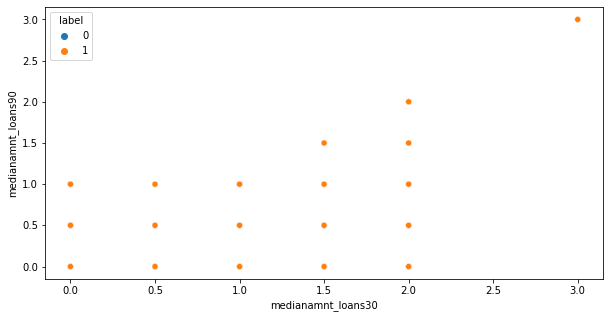

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='medianamnt_loans30', y='medianamnt_loans90', data=df, hue='label')


<AxesSubplot:xlabel='maxamnt_loans30', ylabel='maxamnt_loans90'>

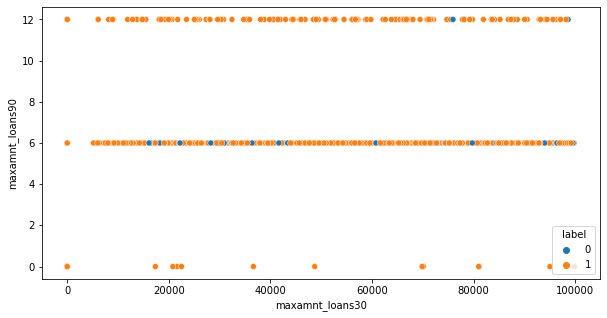

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='maxamnt_loans30', y='maxamnt_loans90', data=df, hue='label')


<AxesSubplot:xlabel='cnt_loans30', ylabel='cnt_loans90'>

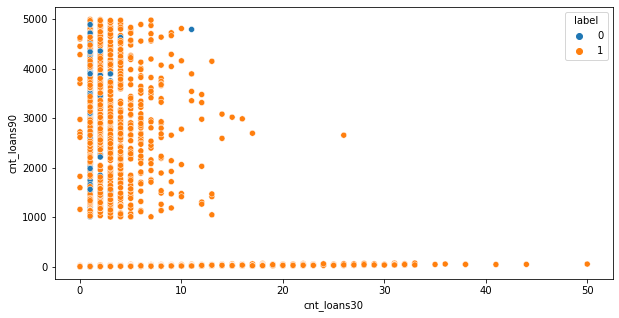

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='cnt_loans30', y='cnt_loans90', data=df, hue='label')


<AxesSubplot:xlabel='amnt_loans30', ylabel='amnt_loans90'>

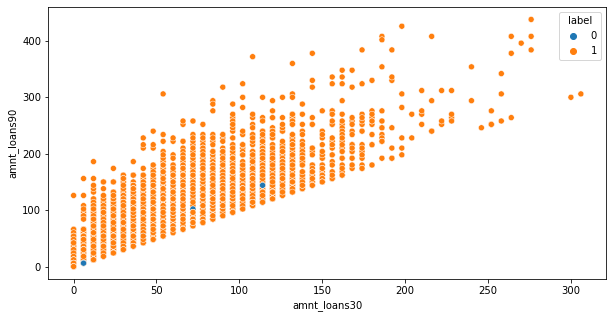

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='amnt_loans30', y='amnt_loans90', data=df, hue='label')


<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='cnt_ma_rech90'>

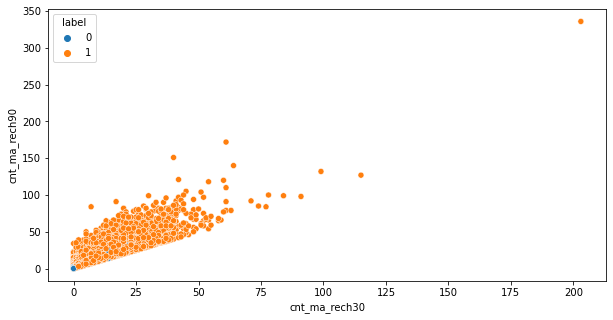

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='cnt_ma_rech30', y='cnt_ma_rech90', data=df, hue='label')

<AxesSubplot:xlabel='fr_da_rech30', ylabel='fr_da_rech90'>

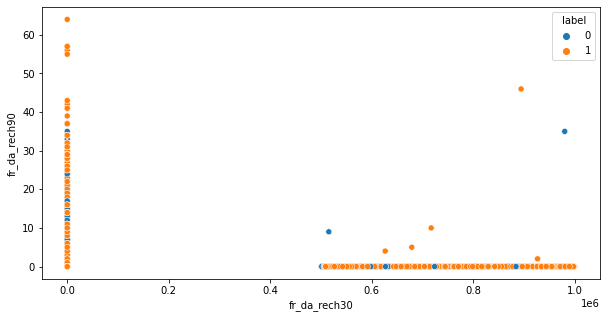

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='fr_da_rech30', y='fr_da_rech90', data=df, hue='label')

<AxesSubplot:xlabel='fr_ma_rech30', ylabel='fr_ma_rech90'>

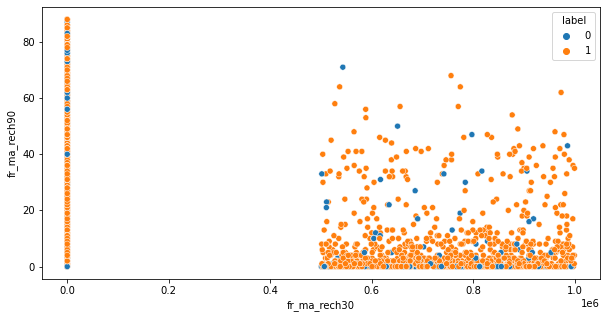

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='fr_ma_rech30', y='fr_ma_rech90', data=df, hue='label')

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='medianamnt_ma_rech90'>

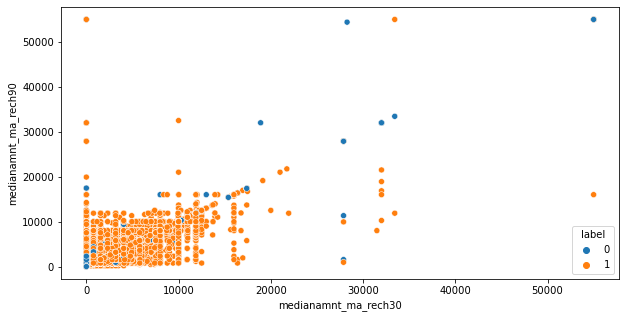

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='medianamnt_ma_rech30', y='medianamnt_ma_rech90', data=df, hue='label')


<AxesSubplot:xlabel='daily_decr30', ylabel='daily_decr90'>

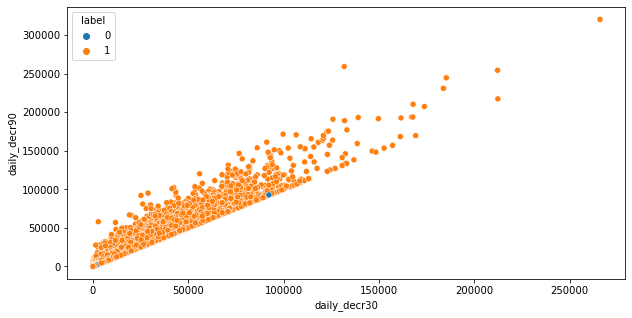

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='daily_decr30', y='daily_decr90', data=df, hue='label')

<AxesSubplot:xlabel='rental30', ylabel='rental90'>

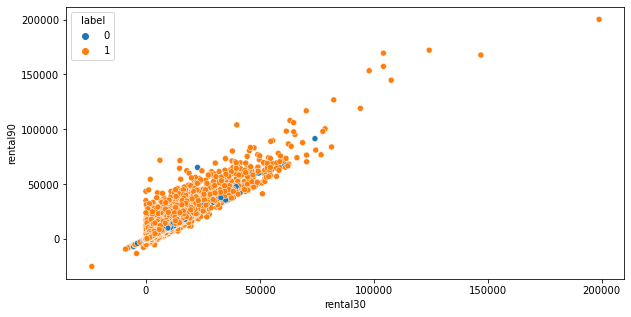

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='rental30', y='rental90', data=df, hue='label')

<AxesSubplot:xlabel='payback30', ylabel='payback90'>

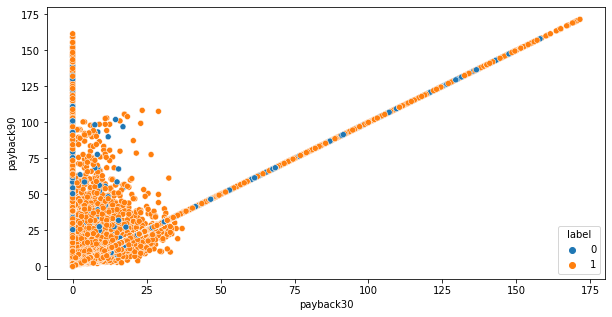

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='payback30', y='payback90', data=df, hue='label')


<AxesSubplot:xlabel='medianmarechprebal30', ylabel='medianmarechprebal90'>

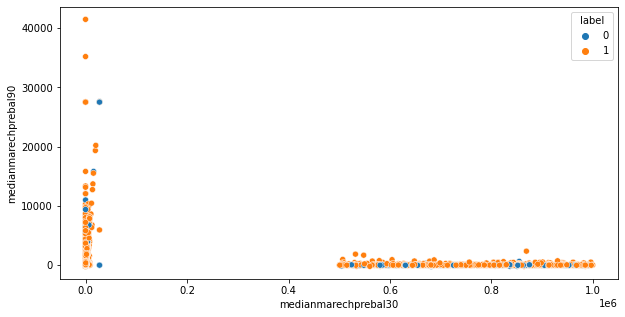

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='medianmarechprebal30', y='medianmarechprebal90', data=df, hue='label')

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='sumamnt_ma_rech90'>

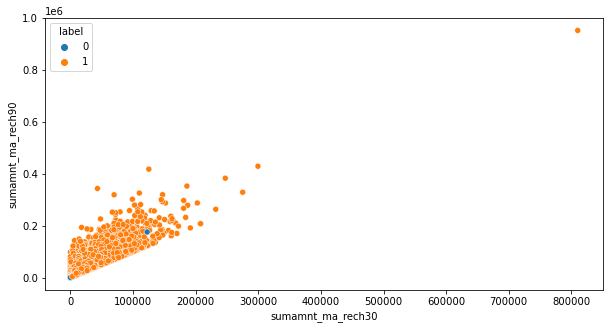

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sumamnt_ma_rech30', y='sumamnt_ma_rech90', data=df, hue='label')

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='cnt_da_rech90'>

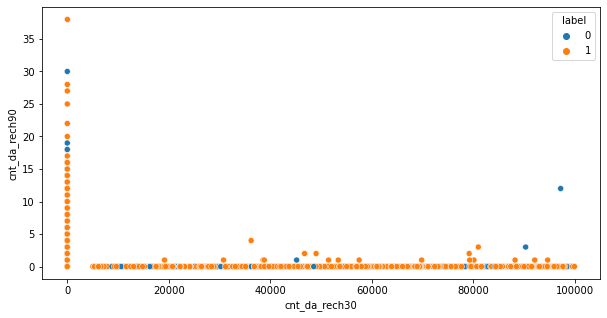

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='cnt_da_rech30', y='cnt_da_rech90', data=df, hue='label')


From the above plot it is clear that most people has purchased loan in all possible scenarios.

In [15]:
df.describe()


,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,0.875177,8112.380399,5381.412999,6082.529123,2692.578912,3483.407309,3755.865715,3712.220632,2064.458973,3.978053,3737.372947,7704.496570,1812.819258,3851.945862,6.315437,7.716812,12396.236149,1864.597375,92.025522,262.579362,3749.512336,0.041495,0.045713,2.758975,17.951992,274.660029,0.054029,18.520988,23.645397,6.703138,0.046078,3.398639,4.321302,6.797321,14.398899
std,0.330519,75696.261220,9220.644093,10918.836919,4308.596841,5770.475034,53906.020204,53374.960145,2370.790003,4.256099,53643.752523,10139.645685,2070.869474,54006.502647,7.193487,12.590273,16857.832129,2081.685508,369.216539,4183.907920,53885.542905,0.397557,0.951388,2.554507,17.379778,4245.274734,0.218039,224.797957,26.469924,2.103869,0.200692,8.813330,10.307791,0.741437,8.438899
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,42.439500,42.691917,280.417500,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1469.091833,1500.000000,1083.540000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.000000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.000000
75%,1.000000,982.000000,7244.096000,7802.795000,3356.945000,4201.792500,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.000000


The dataset seems to have outliers and skewness present in it. We shall handle it with proper processes

# To find Correlation

In [16]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
label,1.000000,-0.003785,0.168298,0.166151,0.058084,0.075521,0.003728,0.001711,0.131805,0.237331,0.001330,0.202828,0.141491,-0.004829,0.236393,0.084386,0.205794,0.120855,0.039300,0.003827,-0.000026,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044590,0.004733,0.199788,0.084144,0.035747,0.048330,0.049178,0.154948,0.006824
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001942,0.002205,-0.001863,0.000663
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078300,0.762981,0.257846,0.037495,0.000700,-0.001500,0.038814,0.020673,0.366117,0.471492,-0.000028,-0.011611,0.008962,0.563496,0.400199,-0.037305,0.026922,0.047181,0.518664,0.006478
daily_decr90,0.166151,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264130,0.426708,-0.000343,0.603886,0.282959,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000660,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005592,0.009446,0.567204,0.397251,-0.034686,0.019406,0.040806,0.539411,-0.021507
rental30,0.058084,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003262,0.127272,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033529,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234212,-0.035489,0.072974,0.095148,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067114,0.099505,0.429408,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002231,-0.001582,-0.001207,0.000561
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003262,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000079,0.000418,-0.001800,0.000631
last_rech_amt_ma,0.131805,0.004256,0.275837,0.264130,0.127272,0.121416,-0.000147,-0.000149,1.000000,-0.002661,0.002876,0.440821,0.794646,-0.002342,0.016706,0.106265,0.418735,0.818735,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027611,0.008503,0.001000,0.028370,0.000093,0.014067,0.148459,0.021004,-0.027358,-0.014251,0.096920,0.028886
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426708,0.233343,0.230260,0.004311,0.001549,-0.002661,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886434,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000110,-0.067010,0.014703,0.685257,0.174105,-0.071451,0.043614,0.017358,0.156148,0.068642


<AxesSubplot:>

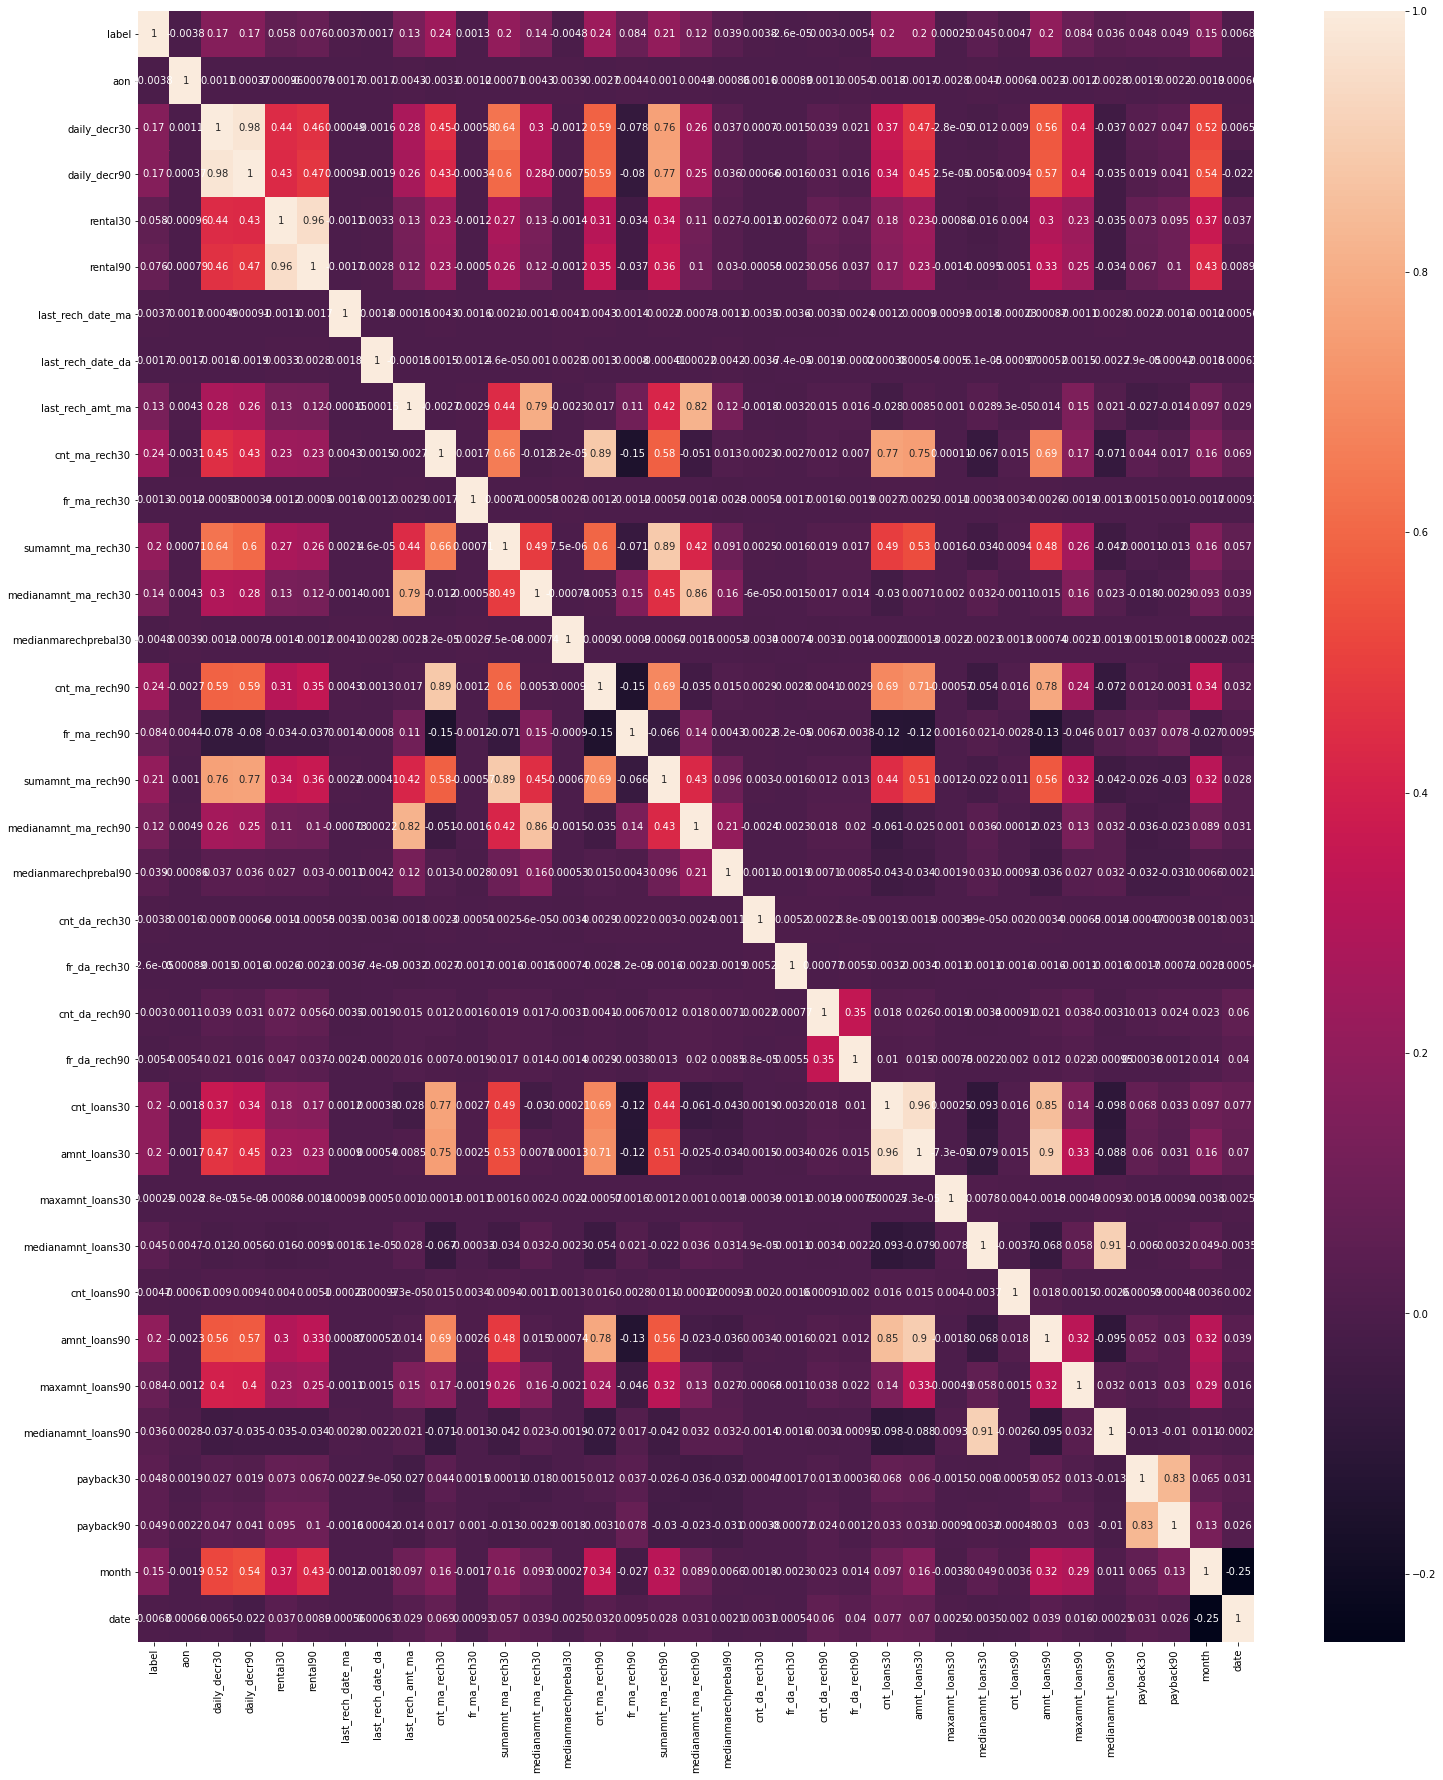

In [17]:
plt.figure(figsize=(25,30))
sns.heatmap(df.corr(), annot=True)

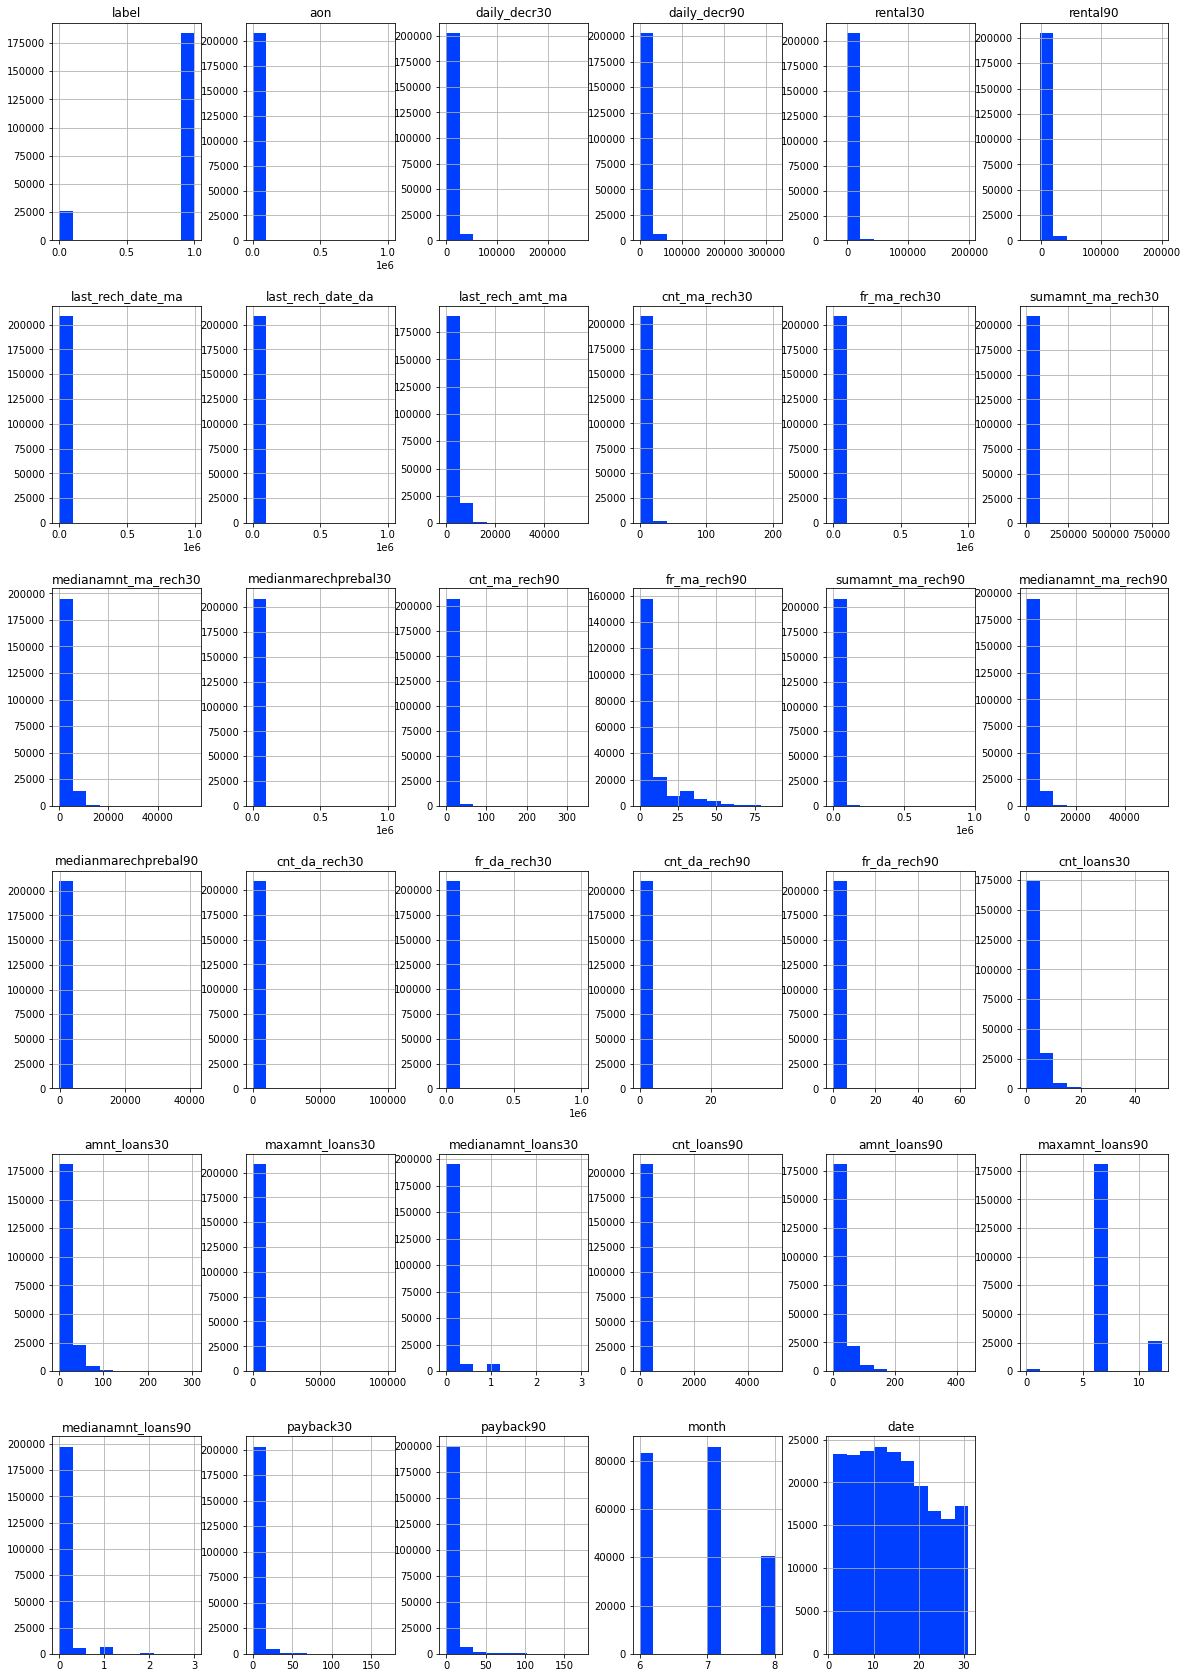

In [18]:
plt.style.use('seaborn-bright')
df.hist(figsize=(20,30))
plt.show()

Observation:
for feature aon:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature daily_descr30:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature daily_descr90:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature rental30:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature rental90:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature last_rech_date_ma:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature last_rech_date_da:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature last_rech_amt_ma:

Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature cnt_ma_rech30:

Data is not distributed normally or in well curve.
Data is spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature fr_ma_rech30:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature sumamnt_ma_rech30:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature medianamnt_ma_rech30:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature medianmarechprebal30:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature cnt_ma_rech90:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature fr_ma_rech90:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature sumamnt_ma_rech90:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature medianamnt_ma_rech90:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature medianmarechprebal90:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature cnt_da_rech30:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature fr_da_rech30:

Data is not distributed normally or in well curve.
Data is highly spreaded and needs to be treated accordingly.
Data is positively skewed and needs to be treated accordingly.

for feature cnt_da_rech90:

Data is distributed normally but not in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature fr_da_rech90:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature cnt_loans30:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature amnt_loans30:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature maxamnt_loans30:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature medianamnt_loans30:

Data is not distributed normally or in well curve and it is understandable as feature has only limited set of values.
Data is positively skewed and needs to be treated accordingly.

for feature cnt_loans90:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature amnt_loans90:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature maxamnt_loans90:

Data is not distributed normally or in well curve and it understandable as user has two option for loans i.e., 5 and 10 for with 6 and 12 has to be paid.
Data is positively skewed and needs to be treated accordingly.

for feature medianamnt_loans90:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature payback30:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

for feature payback90:

Data is not distributed normally or in well curve.
Data is positively skewed and needs to be treated accordingly.

# Correlation Bar Plot comparing target column with the feature columns

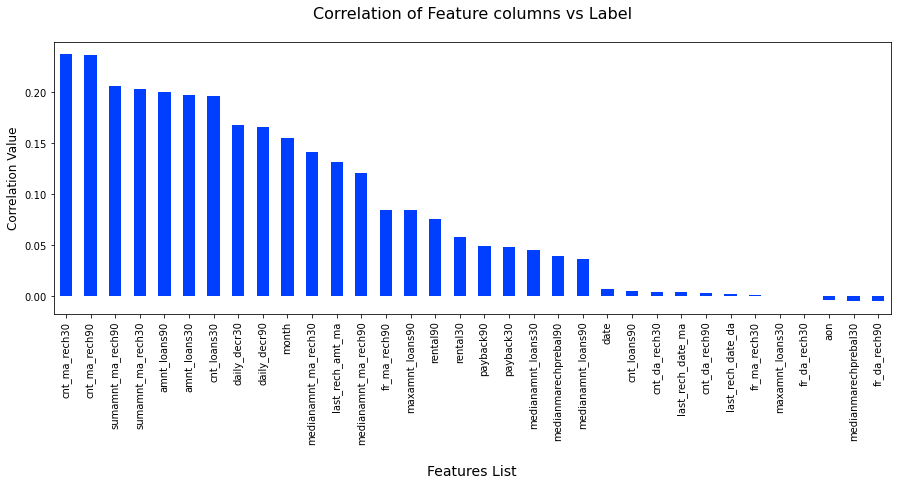

In [19]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['label'].sort_values(ascending=False).drop('label').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

# Check For Skewness

In [20]:
df.skew().sort_values(ascending=True)

label                   -2.270245
date                     0.199856
month                    0.343245
maxamnt_loans90          1.678297
fr_ma_rech90             2.285415
cnt_loans30              2.713426
amnt_loans30             2.975720
amnt_loans90             3.149999
cnt_ma_rech30            3.283838
cnt_ma_rech90            3.425244
medianamnt_ma_rech30     3.512314
medianamnt_ma_rech90     3.752696
last_rech_amt_ma         3.781141
daily_decr30             3.946219
daily_decr90             4.252553
rental90                 4.437670
rental30                 4.521921
medianamnt_loans30       4.551031
medianamnt_loans90       4.895707
sumamnt_ma_rech90        4.897937
sumamnt_ma_rech30        6.386774
payback90                6.900427
payback30                8.311500
aon                     10.392923
fr_ma_rech30            14.772797
fr_da_rech30            14.776395
medianmarechprebal30    14.779840
last_rech_date_ma       14.790938
last_rech_date_da       14.814821
cnt_loans90   

In [21]:
df1=df.drop('label', axis=1)

In [22]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [23]:
df1['label']= df['label']

# Outliers

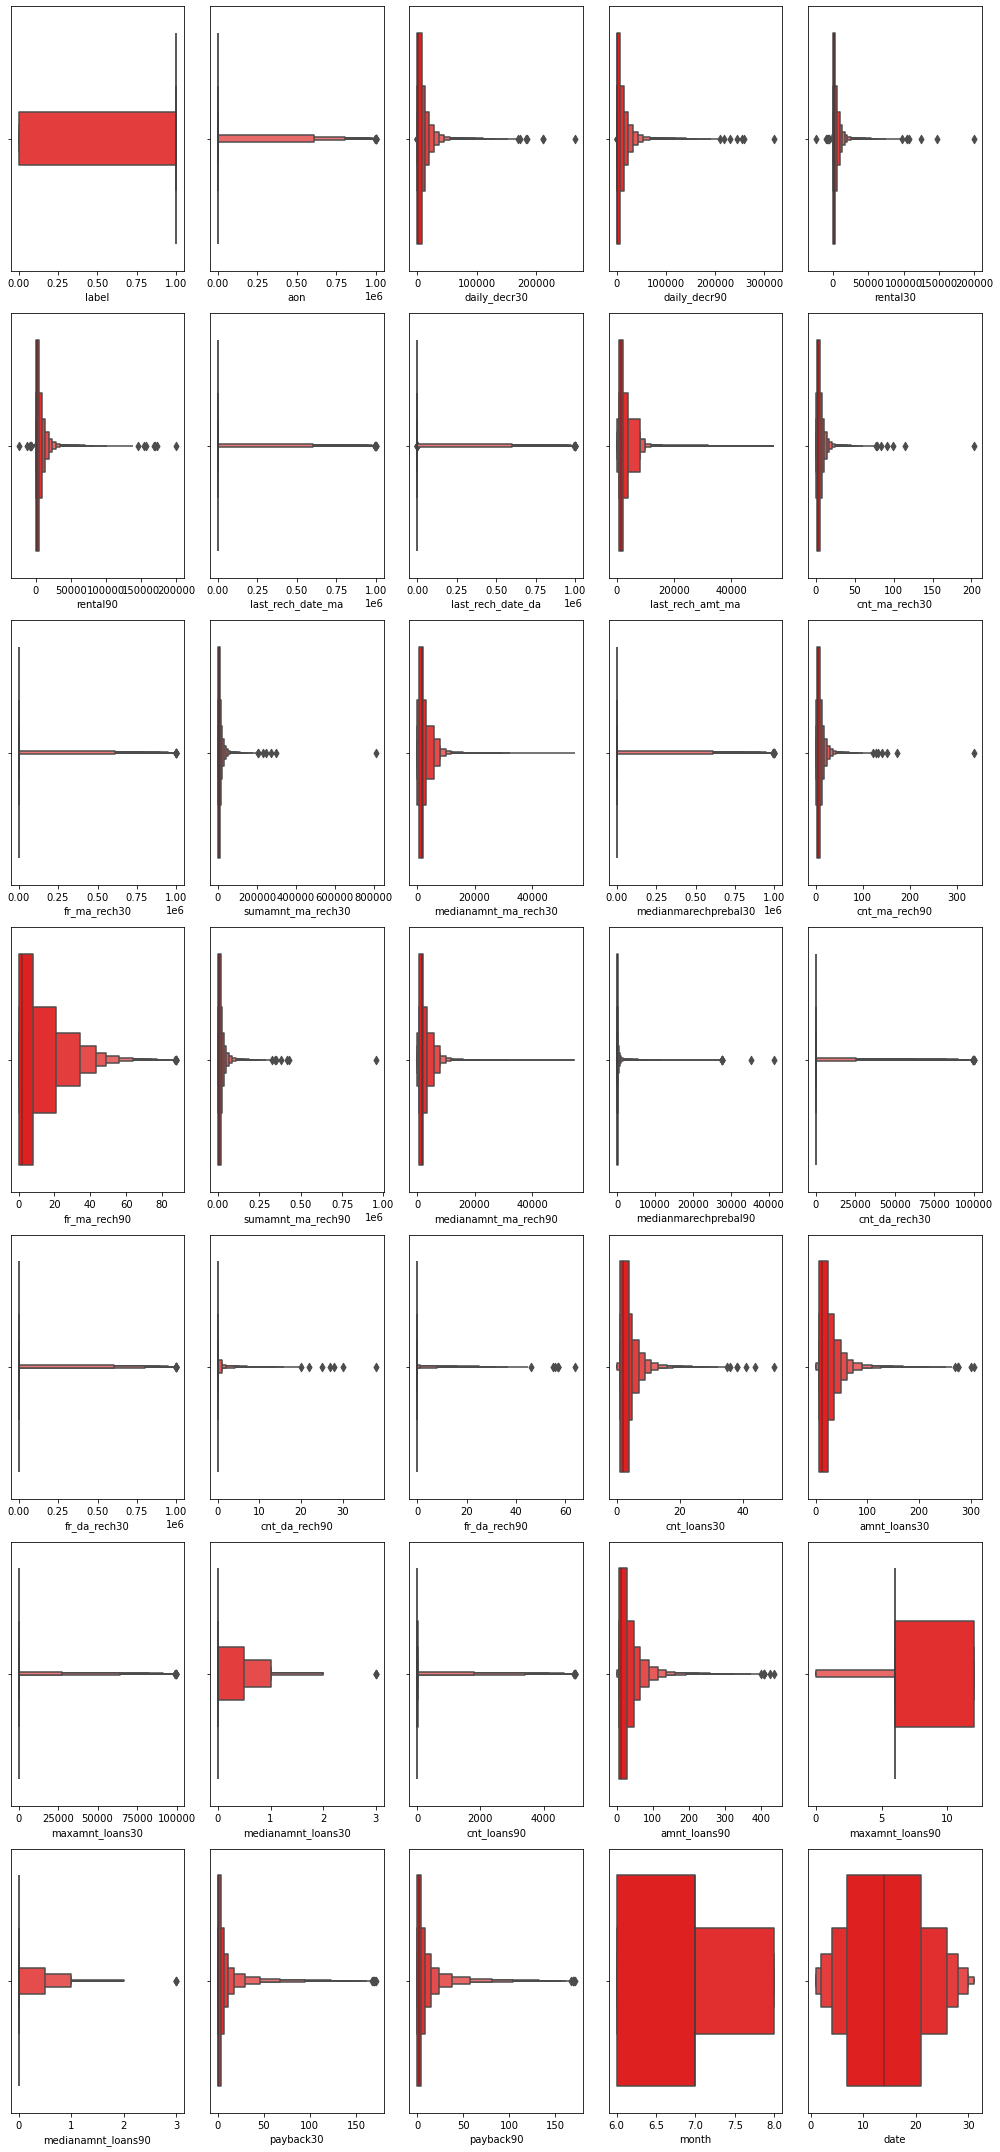

In [24]:
plt.figure(figsize=(14,30))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='red')
    plt.tight_layout()

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.1035771 , 0.2523    , 0.27634686, ..., 0.27336107, 0.66372572,
        2.64788862],
       [0.09776438, 0.73103386, 0.55337719, ..., 1.62209677, 0.52126576,
        0.37765939],
       [0.10010268, 0.43201131, 0.4290329 , ..., 1.62209677, 0.54522657,
        0.37765939],
       ...,
       [0.09378795, 0.70078771, 0.53319184, ..., 0.27336107, 1.73021806,
        0.37765939],
       [0.08428944, 0.77075226, 0.59455567, ..., 0.27336107, 1.25622146,
        0.37765939],
       [0.08628426, 0.09674521, 0.14174704, ..., 0.27336107, 0.87676321,
        0.37765939]])

In [26]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209585, 209586, 209586], dtype=int64), array([14, 14, 31, ..., 27, 25, 29], dtype=int64))


In [27]:
df_new= df1[(z<3).all(axis=1)]

In [28]:
df.shape

(209592, 35)

In [29]:
df_new.shape

(161465, 35)

In [30]:
df1= pd.DataFrame(df_new, columns= df.columns)

Removing outliers causes 23% data loss, so im using the file with outliers so as not to affect the performance

# Spliting the data

In [85]:
x = df.drop('label', axis=1)
y = df['label']

In [86]:
y.value_counts()

1    183430
0     26162
Name: label, dtype: int64

In [82]:
x.shape

(209592, 34)

The target variable is highly imbalanced which may affect lead to biasing and low performance. So we shall balance it with SMOTE

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
x = pd.DataFrame(x.toarray())


In [83]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [ ]:
y1.value_counts()

# Scaling Of Features

In [87]:
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
0,-0.103577,-0.252300,-0.276347,-0.573842,-0.558582,-0.069637,-0.06955,-0.221639,-0.464758,-0.069279,-0.456279,-0.132225,-0.071185,-0.599910,1.055038,-0.552755,-0.156411,-0.228933,-0.06276,-0.069583,-0.104375,-0.048048,-0.297113,-0.342467,-0.063285,-0.247795,-0.073493,-0.439949,-0.334212,-0.229594,2.904852,2.394185,0.273361,0.663726
1,-0.097764,0.731034,0.553377,0.231789,0.036020,-0.069303,-0.06955,1.570173,-0.699716,-0.069670,-0.189109,1.919093,-0.070194,-0.738925,-0.612920,-0.392058,1.884248,-0.083923,-0.06276,-0.069583,-0.104375,-0.048048,-0.688579,-0.342467,-0.061871,-0.247795,-0.077941,-0.439949,2.517683,-0.229594,-0.385626,-0.419228,1.622097,-0.521266
2,-0.100103,-0.432011,-0.429033,-0.416018,-0.447673,-0.069619,-0.06955,-0.221639,-0.699716,-0.069670,-0.608060,-0.132225,-0.070096,-0.738925,-0.612920,-0.644049,-0.156411,-0.069622,-0.06276,-0.069583,-0.104375,-0.048048,-0.688579,-0.687697,-0.063285,-0.247795,-0.077941,-0.666622,-0.334212,-0.229594,-0.385626,-0.419228,1.622097,0.545227
3,-0.103987,-0.581326,-0.555125,-0.587933,-0.576035,-0.068914,-0.06955,-0.471346,-0.934673,-0.069670,-0.759841,-0.875392,-0.071324,-0.738925,-0.612920,-0.679166,-0.440796,-0.242475,-0.06276,-0.069583,-0.104375,-0.048048,-0.297113,-0.342467,-0.063285,-0.247795,-0.073493,-0.439949,-0.334212,-0.229594,-0.385626,-0.419228,-1.075375,-0.995262
4,-0.094660,-0.567293,-0.543274,-0.369884,-0.413226,-0.069600,-0.06955,0.103148,0.710029,-0.069633,1.215480,0.239601,-0.070787,0.234180,-0.454067,0.658435,0.491623,-0.154450,-0.06276,-0.069583,-0.104375,-0.048048,1.660217,1.383681,-0.063285,-0.247795,-0.051251,0.693415,-0.334212,-0.229594,-0.120875,-0.192861,-1.075375,0.900724


# Train The Model

In [88]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [113]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.95 on Random_state 33


# To Find the Best Cross Validation Score

In [114]:
pred_tr= lg.predict(xtrain)
pred_ts= lg.predict(xtest)

In [94]:
from sklearn.model_selection import cross_val_score

In [115]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [116]:

for j in range(2,10):
    cv_score= cross_val_score(lg,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.7354876519653273 and accuracy score for training is 0.7356204339766655 and the accuracy for testing is 0.85


At cross fold 3 the cv score is 0.7349452154436099 and accuracy score for training is 0.7356204339766655 and the accuracy for testing is 0.85


At cross fold 4 the cv score is 0.7350951316578532 and accuracy score for training is 0.7356204339766655 and the accuracy for testing is 0.85


At cross fold 5 the cv score is 0.7349860982391101 and accuracy score for training is 0.7356204339766655 and the accuracy for testing is 0.85


At cross fold 6 the cv score is 0.7348143764883573 and accuracy score for training is 0.7356204339766655 and the accuracy for testing is 0.85


At cross fold 7 the cv score is 0.7349097828841205 and accuracy score for training is 0.7356204339766655 and the accuracy for testing is 0.85


At cross fold 8 the cv score is 0.7349288624985225 and accuracy score for training is 0.7356204339766655 and the accuracy for testing is

# Check The Accuracy and Error

In [91]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=33)

In [92]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[ 0  1]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      0.95      0.95        19

    accuracy                           0.90        20
   macro avg       0.47      0.47      0.47        20
weighted avg       0.90      0.90      0.90        20

Score: 0.8768442349168782
Acc_score: 0.9


In [96]:
cv_score=cross_val_score(lg,x,y, cv=2)
print('Cross Validation Score of LogisticRegression is:', cv_score.mean())

Cross Validation Score of LogisticRegression is: 0.8767891904271156


In [97]:
#GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
predgnb= gnb.predict(xtest)
print( confusion_matrix(predgnb,ytest))
print( classification_report(predgnb,ytest))
print('Acc_score:', accuracy_score(predgnb,ytest))

[[ 0 11]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.42      0.89      0.57         9

    accuracy                           0.40        20
   macro avg       0.21      0.44      0.29        20
weighted avg       0.19      0.40      0.26        20

Acc_score: 0.4


In [98]:
cv_score=cross_val_score(gnb,x,y, cv=2)
print('Cross Validation Score of GaussianNB is:', cv_score.mean())

Cross Validation Score of GaussianNB is: 0.5891446238406046


In [99]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[ 0  2]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.94      0.92        18

    accuracy                           0.85        20
   macro avg       0.45      0.47      0.46        20
weighted avg       0.81      0.85      0.83        20

Acc_score: 0.85


In [100]:
cv_score=cross_val_score(dtc,x,y, cv=2)
print('Cross Validation Score of DecisionTreeClassifier is:', cv_score.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.8840270621016069


In [101]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[ 0  0]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97        20

    accuracy                           0.95        20
   macro avg       0.50      0.47      0.49        20
weighted avg       1.00      0.95      0.97        20

Acc_score: 0.95


In [102]:
cv_score=cross_val_score(rf,x,y, cv=2)
print('Cross Validation Score of RandomForestClassifier is:', cv_score.mean())

Cross Validation Score of RandomForestClassifier is: 0.920836673155464


In [103]:
#knn
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print( confusion_matrix(predknn,ytest))
print( classification_report(predknn,ytest))
print('Acc_score:', accuracy_score(predknn,ytest))

[[ 0  0]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97        20

    accuracy                           0.95        20
   macro avg       0.50      0.47      0.49        20
weighted avg       1.00      0.95      0.97        20

Acc_score: 0.95


In [105]:
cv_score=cross_val_score(knn,x,y, cv=2)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.8870710714149395


# HyperParameter Tuning With GridSearchCV

In [106]:
from sklearn.model_selection import GridSearchCV

In [108]:
RandomForestClassifier()

RandomForestClassifier()

In [109]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["gini","entrophy"],
            'max_depth':[3,4,5,6],
            'min_samples_split': [2,3,4,5]}

In [110]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=2, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [111]:
GCV.best_estimator_

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2)

In [112]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.95

In [113]:
fnrf=RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2)
fnrf.fit(xtrain,ytrain)
predfnrf= fnrf.predict(xtest)
print( confusion_matrix(predfnrf,ytest))
print( classification_report(predfnrf,ytest))
print('Acc_score:', accuracy_score(predfnrf,ytest))

[[ 0  0]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97        20

    accuracy                           0.95        20
   macro avg       0.50      0.47      0.49        20
weighted avg       1.00      0.95      0.97        20

Acc_score: 0.95


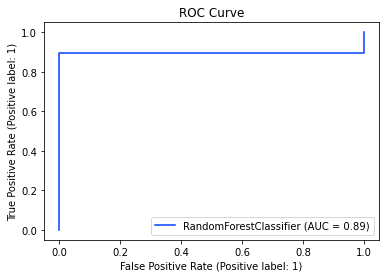

In [117]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,xtest,ytest)
plt.title('ROC Curve')
plt.show()

In [118]:
from sklearn import metrics

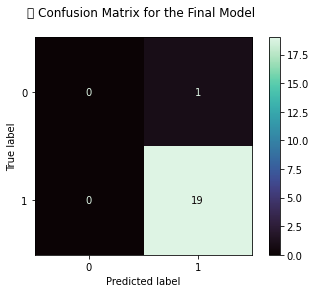

In [122]:
metrics.plot_confusion_matrix(fnrf, xtest, ytest, cmap='mako')
plt.title('\t Confusion Matrix for the Final Model \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my final model missed to provide the correct prediction (depicting in the black boxes)

# Saving the final model

In [123]:
import pickle
filename= 'MCDP.pkl'
pickle.dump(fnrf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [124]:
x=np.array(ytest)
predicted= np.array(fnrf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,1


The predicted results are nearly equal to the actual results. The model gave good performance.

After complete analysis of the dataset, we did all the processing of the dataset to make it clean and structured to train different models to get the desired output.

RandomforestClassifier gave good results with the accuracy of 90%.